In [6]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, Model

In [3]:
%%capture
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [34]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [39]:
input = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(64, (3, 3), activation='relu')(input)
pool1 = layers.MaxPool2D()(conv1)
conv2 = layers.Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = layers.MaxPool2D()(conv2)
x = layers.Flatten()(pool2)
dense1 = layers.Dense(128, activation='relu')(x)
dense2 = layers.Dense(10, activation='softmax')(dense1)

model = Model(inputs=[input], outputs=[dense2])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0  

In [40]:
from tensorflow.keras import callbacks

checkpoint = callbacks.ModelCheckpoint('model_checkpoint.keras',
                                       monitor='val_loss',
                                       save_best_only=True)
logger = callbacks.CSVLogger('log.csv')

callbacks = [checkpoint, logger]

In [41]:
history = model.fit(training_images, training_labels,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/50
375/375 [==============================] - 3s 7ms/step - loss: 1.1747 - accuracy: 0.5771 - val_loss: 0.7616 - val_accuracy: 0.6964
Epoch 2/50
375/375 [==============================] - 2s 7ms/step - loss: 0.7269 - accuracy: 0.7262 - val_loss: 0.6858 - val_accuracy: 0.7222
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.6679 - accuracy: 0.7476 - val_loss: 0.6355 - val_accuracy: 0.7614
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.6201 - accuracy: 0.7670 - val_loss: 0.6125 - val_accuracy: 0.7694
Epoch 5/50
375/375 [==============================] - 2s 7ms/step - loss: 0.5829 - accuracy: 0.7810 - val_loss: 0.5714 - val_accuracy: 0.7904
Epoch 6/50
375/375 [==============================] - 2s 7ms/step - loss: 0.5489 - accuracy: 0.7957 - val_loss: 0.5291 - val_accuracy: 0.8006
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.5215 - accuracy: 0.8057 - val_loss: 0.5197 - val_accuracy: 0.8084
Epoch 

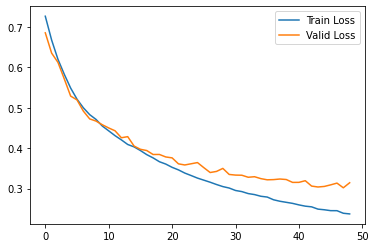

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Valid Loss')
plt.legend()

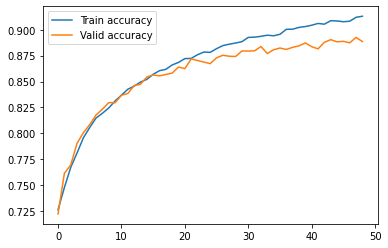

In [43]:
plt.plot(history.history['accuracy'][1:], label='Train accuracy')
plt.plot(history.history['val_accuracy'][1:], label='Valid accuracy')
plt.legend()

In [44]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8885


[0.31992703676223755, 0.8884999752044678]